In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from scipy.stats import linregress
import itertools
import os
import re
import glob
import numpy as np 
from scipy.interpolate import interp1d


1. Activation of glutamatergic neurons
In this set of tseries the fps was kept constant at 1.078fps
2. Activation of OviDN neurons
In this set of tseries the fps varied between 1.5 and 4 fps. 

In [2]:
fps_vglut = 1.078
# fps_ovidn = range(1.5, 4)

# Data Load

In [3]:
path = "./Calcium_imaging"

directories = os.listdir(path)
lef_df = []
ri_df = []

for directory in directories:
    if directory != '.DS_Store':
        population = os.path.join(path, directory)
        sub_dir = os.listdir(population)
#         print(sub_dir)

        for el in sub_dir:
            if el.startswith('left'):
                
                sub_sub = os.path.join(population, el)
#                 print(sub_sub)
                
                for filename in os.listdir(sub_sub):
                    if filename.endswith('.csv'):
#                         print(filename)
                        with open(os.path.join(sub_sub, filename), 'r') as f:
                            df = pd.read_csv(f)
                            df['name'] =filename
                            lef_df.append(df)
            elif el.startswith('right'):
                
                sub_sub = os.path.join(population, el)
#                 print(sub_sub)

                for filename in os.listdir(sub_sub):
                    if filename.endswith('.csv'):
#                         print(filename)
                        with open(os.path.join(sub_sub, filename), 'r') as f:
                            df = pd.read_csv(f)
                            df['name'] = filename
                            ri_df.append(df)
                        

In [222]:
# Create a daraframe with all the t-series 
right = pd.concat(ri_df)
left = pd.concat(lef_df)
traces = pd.concat([left, right])
traces.head()

,Slice,Mean,name
0,1,650.35,Vglut_left_508_1_Values.csv
1,2,654.40,Vglut_left_508_1_Values.csv
2,3,665.00,Vglut_left_508_1_Values.csv
3,4,659.00,Vglut_left_508_1_Values.csv
4,5,670.40,Vglut_left_508_1_Values.csv


In [223]:
# Reorganize the columns
def get_name(row):
    row['population'] = str(row['name']).split('_')[0] + '_activation'
    row['side'] = str(row['name']).split('_')[1]
    row['stack'] = str(row['name']).split('_')[2]
    row['cell'] = str(row['name']).split('_')[3]
    row['stack_cell'] = str(row['name']).split('_')[2] +'_'+ str(row['name']).split('_')[3]
    return row
traces = traces.apply(get_name, axis=1)

# Convert stack and cell from string in integers
traces['stack'] = traces['stack'].astype(int)
traces['cell'] = traces['cell'].astype(int)

# REname columns
traces = traces.rename(columns={'Slice':'Frame', 'Mean':'ROI_mean_Fluo'})

# data = data.drop(columns='name')
traces

,Frame,ROI_mean_Fluo,name,population,side,stack,cell,stack_cell
0,1,650.350,Vglut_left_508_1_Values.csv,Vglut_activation,left,508,1,508_1
1,2,654.400,Vglut_left_508_1_Values.csv,Vglut_activation,left,508,1,508_1
2,3,665.000,Vglut_left_508_1_Values.csv,Vglut_activation,left,508,1,508_1
3,4,659.000,Vglut_left_508_1_Values.csv,Vglut_activation,left,508,1,508_1
4,5,670.400,Vglut_left_508_1_Values.csv,Vglut_activation,left,508,1,508_1
...,...,...,...,...,...,...,...,...
44,45,520.083,OviDN_right_555_7_Values.csv,OviDN_activation,right,555,7,555_7
45,46,507.083,OviDN_right_555_7_Values.csv,OviDN_activation,right,555,7,555_7
46,47,517.917,OviDN_right_555_7_Values.csv,OviDN_activation,right,555,7,555_7
47,48,497.639,OviDN_right_555_7_Values.csv,OviDN_activation,right,555,7,555_7


In [224]:
# Get the fps for each t-series

# Get the fps for each t-series
def get_fps(row):
    
    # For VGlut the fps is constant
    if row['population'] == 'Vglut_activation':
        fps = fps_vglut
        
    # For OviDN the fps varies in different t-series
    else:
        if row['stack'] == 539:
            fps = 2.104
        elif row['stack'] == 541:
            fps = 1.785
        elif row['stack'] == 544:
            fps = 2.834
        elif row['stack'] == 546:
            fps = 1.416
        elif row['stack'] == 547:
            fps = 1.295
        elif row['stack'] == 549:
            fps = 0.964
        elif row['stack'] == 550:
            fps = 0.829
        elif row['stack'] == 552:
            fps = 1.769
        elif row['stack'] == 553:
            fps = 3.571
        elif row['stack'] == 554:
            fps = 2.154
        elif row['stack'] == 555:
            fps = 1.610
        elif row['stack'] == 556:
            fps = 3.357
        elif row['stack'] == 557:
            fps = 3.385
        elif row['stack'] == 558:
            fps = 2.401
        elif row['stack'] == 559:
            fps = 2.331
        elif row['stack'] == 560:
            fps = 1.678
        elif row['stack'] == 561:
            fps = 1.767
        else:
            fps = NaN
    row['fps'] = fps
    return row

traces = traces.apply(get_fps, axis=1)
traces

,Frame,ROI_mean_Fluo,name,population,side,stack,cell,stack_cell,fps
0,1,650.350,Vglut_left_508_1_Values.csv,Vglut_activation,left,508,1,508_1,1.078
1,2,654.400,Vglut_left_508_1_Values.csv,Vglut_activation,left,508,1,508_1,1.078
2,3,665.000,Vglut_left_508_1_Values.csv,Vglut_activation,left,508,1,508_1,1.078
3,4,659.000,Vglut_left_508_1_Values.csv,Vglut_activation,left,508,1,508_1,1.078
4,5,670.400,Vglut_left_508_1_Values.csv,Vglut_activation,left,508,1,508_1,1.078
...,...,...,...,...,...,...,...,...,...
44,45,520.083,OviDN_right_555_7_Values.csv,OviDN_activation,right,555,7,555_7,1.610
45,46,507.083,OviDN_right_555_7_Values.csv,OviDN_activation,right,555,7,555_7,1.610
46,47,517.917,OviDN_right_555_7_Values.csv,OviDN_activation,right,555,7,555_7,1.610
47,48,497.639,OviDN_right_555_7_Values.csv,OviDN_activation,right,555,7,555_7,1.610


In [225]:
# Convert the frames in slice in seconds, depending on the fps
traces['Time (msec)'] = (traces['Frame'] / traces['fps'])*1000
traces.head()

,Frame,ROI_mean_Fluo,name,population,side,stack,cell,stack_cell,fps,Time (msec)
0,1,650.35,Vglut_left_508_1_Values.csv,Vglut_activation,left,508,1,508_1,1.078,927.643785
1,2,654.40,Vglut_left_508_1_Values.csv,Vglut_activation,left,508,1,508_1,1.078,1855.287570
2,3,665.00,Vglut_left_508_1_Values.csv,Vglut_activation,left,508,1,508_1,1.078,2782.931354
3,4,659.00,Vglut_left_508_1_Values.csv,Vglut_activation,left,508,1,508_1,1.078,3710.575139
4,5,670.40,Vglut_left_508_1_Values.csv,Vglut_activation,left,508,1,508_1,1.078,4638.218924


In [ ]:
# Example for one cell 
cell1 = traces[traces['stack_cell'] == '508_1']

baseline_f = cell1['Mean'][0:11].mean()
cell1['dF_F'] = (cell1['Mean'] - baseline_f)/baseline_f
cell1

fig, ax = plt.subplots()
ax.plot(cell1['Slice'], cell1['dF_F'])

ax1 = ax.twinx()
ax1.plot(Vrec_file['Time(ms)']/(1000*fps_vglut), Vrec_file[' Input 0'], c='r', alpha=0.5)
ax1.get_xaxis().set_visible(True)
# ax2.xaxis.set_label_position('bottom') 

plt.show()

In [ ]:
traces.head()

In [226]:
# Get the stimulus from Voltage Recording for a whole stack t-serie

voltage_recording = []

for directory in directories:
#     print(directory)
    if directory != '.DS_Store':
        population = os.path.join(path, directory)
        sub_dir = os.listdir(population)
#         print(sub_dir)

        for el in sub_dir:
            if el.startswith('left') or el.startswith('right'):
                sub_dir = os.path.join(population, el)
                content = os.listdir(sub_dir)
#                 print(a)

                for el in content:
                    if el.startswith('TSeries'): 
                        tserie = os.path.join(sub_dir, el)
                        name = tserie.split("/")[-1]
                        stack = name.split("-")[3]

                        for file in glob.glob(tserie + "/TSeries*.csv", recursive=True):
#                             print(file)
#                           
                            Vrec = pd.read_csv(file, delimiter=',')
                            Vrec['name'] = name
                            Vrec['stack'] = stack
                            Vrec['population'] = population.split('/')[2]
                            voltage_recording.append(Vrec)
#                             led_vrec = Vrec_file[' Input 0'].values


In [227]:
# Create a daraframe with Voltage Recording 
voltage = pd.concat(voltage_recording)
voltage = voltage.rename(columns={' Input 0': 'led'})

# Convert stack from string in integers
voltage['stack'] = voltage['stack'].astype(int)

voltage

,Time(ms),led,Input 1,Input 2,Input 3,name,stack,population
0,0,0.000916,2.994385,3.310242,-0.003052,TSeries-02112022-1350-513,513,Vglut_activation
1,1,0.001221,2.994080,3.309631,-0.002136,TSeries-02112022-1350-513,513,Vglut_activation
2,2,0.000305,2.994690,3.309937,-0.003357,TSeries-02112022-1350-513,513,Vglut_activation
3,3,0.000000,2.994080,3.309326,-0.002747,TSeries-02112022-1350-513,513,Vglut_activation
4,4,0.001221,2.995300,3.309937,-0.003052,TSeries-02112022-1350-513,513,Vglut_activation
...,...,...,...,...,...,...,...,...
29995,29995,0.000000,2.995300,0.003357,5.180664,TSeries-02122022-1130-554,554,OviDN_activation
29996,29996,-0.000305,2.993164,0.002136,5.180664,TSeries-02122022-1130-554,554,OviDN_activation
29997,29997,0.002441,2.993164,0.003052,5.180664,TSeries-02122022-1130-554,554,OviDN_activation
29998,29998,0.000000,2.998657,0.003052,5.180969,TSeries-02122022-1130-554,554,OviDN_activation


In [10]:
# Convert msec in seconds
# voltage['sec'] = voltage['Time(ms)']/1000

# Define the LED value for the 1000 msec
conv = []
for x in range(0, 1170):
    start = x*1000
    end = (x+1)*1000
    convert = pd.DataFrame(voltage[start:end].mean()).T
    convert['sec'] = x+1
    conv.append(convert)
voltage_sec = pd.concat(conv)
# voltage_sec['population'] = voltage['population']
# voltage_sec

/var/folders/qw/zs_98d4j48535kh5qwsd3fvr0000gn/T/ipykernel_52442/2164358991.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  convert = pd.DataFrame(voltage[start:end].mean()).T


In [11]:
# Reset the index for keeping track
voltage_sec.reset_index(drop = True, inplace= True)
# voltage_sec

In [12]:
# Convert stack from string in integers
voltage_sec['stack'] = voltage_sec['stack'].astype(int)

# Convert the led stimulus to 0 or 3
voltage_sec['led'] = round(voltage_sec['led']).astype(int)

voltage_sec.dtypes

Time(ms)    float64
led           int64
 Input 1    float64
 Input 2    float64
 Input 3    float64
stack         int64
sec           int64
dtype: object

In [13]:
voltage_sec

,Time(ms),led,Input 1,Input 2,Input 3,stack,sec
0,499.5,0,2.995477,3.309636,5.004301,513,1
1,1499.5,0,2.995487,3.309750,5.066520,513,2
2,2499.5,0,2.995539,3.309706,5.066501,513,3
3,3499.5,0,2.995637,0.016364,5.066314,513,4
4,4499.5,0,2.995509,0.003124,5.066303,513,5
...,...,...,...,...,...,...,...
1165,25499.5,0,2.994482,0.002971,4.936532,554,1166
1166,26499.5,0,2.994486,0.002971,4.983224,554,1167
1167,27499.5,0,2.994580,0.002973,5.009124,554,1168
1168,28499.5,0,2.994528,0.002960,5.003947,554,1169


In [14]:
# from sklearn.linear_model import LinearRegression
# Define a function to interpolate fluorescence values in 30 second timeline
def interpol(stack_cell):
    
    layer = traces[traces['stack_cell'] == stack_cell]
    x = traces[traces['stack_cell'] == stack_cell].shape[0]
    x = np.arange(x)
    
#     print(len(x))
#     print(stack_cel)
    y = layer['ROI_mean_Fluo']
    f = interp1d(x, y)
    
    if len(x) < 30:
        fluor = f(np.arange(1,len(layer)))
    else:
        fluor = f(np.arange(1,31))
    
    pop = layer['population'].iloc[0]
    side = layer['side'].iloc[0]
    stack = layer['stack'].iloc[0]
    cell = layer['cell'].iloc[0] 
    stack_cell = layer['stack_cell'].iloc[0] 
    
    df = pd.DataFrame(fluor, columns=['ROI_mean_Fluo'])
    df['population'] =  layer['population'].iloc[0]
    df['side'] =  layer['side'].iloc[0]
    df['stack'] =  layer['stack'].iloc[0]
    df['cell'] =  layer['cell'].iloc[0]
    df['stack_cell'] =  layer['stack_cell'].iloc[0]
    df['Time (sec)'] = np.arange(1, df.shape[0]+1)

    return df

stack_cell_l = traces['stack_cell'].values

total = []
for stack_cell in stack_cell_l :
    total.append(interpol(stack_cell))

Trace = pd.concat(total)
Trace

,ROI_mean_Fluo,population,side,stack,cell,stack_cell,Time (sec)
0,654.400,Vglut_activation,left,508,1,508_1,1
1,665.000,Vglut_activation,left,508,1,508_1,2
2,659.000,Vglut_activation,left,508,1,508_1,3
3,670.400,Vglut_activation,left,508,1,508_1,4
4,680.050,Vglut_activation,left,508,1,508_1,5
...,...,...,...,...,...,...,...
25,587.361,OviDN_activation,right,555,7,555_7,26
26,611.167,OviDN_activation,right,555,7,555_7,27
27,580.333,OviDN_activation,right,555,7,555_7,28
28,591.000,OviDN_activation,right,555,7,555_7,29


In [ ]:
voltage_sec

In [229]:
voltage

# Convert stack from string in integers
voltage['stack'] = voltage['stack'].astype(int)

# Convert the led stimulus to 0 or 3
voltage['led'] = round(voltage['led']).astype(int)

voltage.dtypes

Time(ms)        int64
led             int64
 Input 1      float64
 Input 2      float64
 Input 3      float64
name           object
stack           int64
population     object
dtype: object

In [15]:
def get_time_stack(stack):
    layer = voltage_sec[voltage_sec['stack'] == stack].copy()
    layer['Time (sec)'] = np.arange(1,31)
    return layer

stack_l = voltage_sec['stack'].values

stimulus = []
for stack in stack_l :
    stimulus.append(get_time_stack(stack))

Led = pd.concat(stimulus)
Led

,Time(ms),led,Input 1,Input 2,Input 3,stack,sec,Time (sec)
0,499.5,0,2.995477,3.309636,5.004301,513,1,1
1,1499.5,0,2.995487,3.309750,5.066520,513,2,2
2,2499.5,0,2.995539,3.309706,5.066501,513,3,3
3,3499.5,0,2.995637,0.016364,5.066314,513,4,4
4,4499.5,0,2.995509,0.003124,5.066303,513,5,5
...,...,...,...,...,...,...,...,...
1165,25499.5,0,2.994482,0.002971,4.936532,554,1166,26
1166,26499.5,0,2.994486,0.002971,4.983224,554,1167,27
1167,27499.5,0,2.994580,0.002973,5.009124,554,1168,28
1168,28499.5,0,2.994528,0.002960,5.003947,554,1169,29


In [100]:
Led[Led['led']==3]['Time (sec)'].unique()

array([11, 21])

In [240]:
trace

Time (sec)                                           1          2          3   \
population       side  stack_cell stack cell                                    
OviDN_activation left  539_1      539   1      632.6120   658.9000   667.2500   
                       539_2      539   2      523.8120   536.7370   535.4250   
                       539_3      539   3      437.6030   444.8450   461.7760   
                       546_1      546   1      921.4000   908.6222   908.9333   
                       546_2      546   2     1394.2700  1409.4050  1416.8920   
...                                                 ...        ...        ...   
Vglut_activation right 523_4      523   4      522.6842   503.8947   489.6842   
                       524_1      524   1      550.0000   550.6670   549.6000   
                       524_2      524   2      365.4546   377.7273   383.9546   
                       524_3      524   3      355.0000   362.1538   359.0385   
                       525_1      525   1      373.0000   370.2143   379.7857   

Time (sec)                                           4          5          6   \
population       side  stack_cell stack cell                                    
OviDN_activation left  539_1      539   1      674.0620   688.3500   699.0500   
                       539_2      539   2      539.6000   546.5750   558.7250   
                       539_3      539   3      452.4660   476.4830   466.2410   
                       546_1      546   1      925.7778   941.4667   925.4445   
                       546_2      546   2     1438.8110  1408.8110  1410.2430   
...                                                 ...        ...        ...   
Vglut_activation right 523_4      523   4      514.5789   542.4211   522.4211   
                       524_1      524   1      553.4670   579.4670   548.2670   
                       524_2      524   2      386.0000   372.5454   374.0909   
                       524_3      524   3      372.9615   366.6538   371.3462   
                       525_1      525   1      373.5000   385.7143   405.6429   

Time (sec)                                           7          8          9   \
population       side  stack_cell stack cell                                    
OviDN_activation left  539_1      539   1      692.4870   690.9500   705.6750   
                       539_2      539   2      559.3620   557.0000   572.4120   
                       539_3      539   3      475.0860   478.0860   477.1380   
                       546_1      546   1      923.5333   931.9333   930.4667   
                       546_2      546   2     1401.2970  1401.1890  1407.1350   
...                                                 ...        ...        ...   
Vglut_activation right 523_4      523   4      531.0000   522.2105   533.1579   
                       524_1      524   1      546.9330   564.4000   555.2670   
                       524_2      524   2      392.2273   396.1818   384.1818   
                       524_3      524   3      366.2692   373.3077   370.6538   
                       525_1      525   1      387.7857   392.4286   417.8571   

Time (sec)                                           10  ...         21  \
population       side  stack_cell stack cell             ...              
OviDN_activation left  539_1      539   1      713.6380  ...   716.5130   
                       539_2      539   2      565.1750  ...   573.0250   
                       539_3      539   3      487.3100  ...   475.0520   
                       546_1      546   1      935.9333  ...   920.1111   
                       546_2      546   2     1409.5410  ...  1526.3510   
...                                                 ...  ...        ...   
Vglut_activation right 523_4      523   4      515.9474  ...   534.3684   
                       524_1      524   1      525.4670  ...   563.4000   
                       524_2      524   2      376.1818  ...   391.5909   
             

In [236]:
voltage = voltage.rename(columns={'Time (sec)':'Time (msec)'})
voltage

,Time (msec),led,Input 1,Input 2,Input 3,name,stack,population
0,0,0,2.994385,3.310242,-0.003052,TSeries-02112022-1350-513,513,Vglut_activation
1,1,0,2.994080,3.309631,-0.002136,TSeries-02112022-1350-513,513,Vglut_activation
2,2,0,2.994690,3.309937,-0.003357,TSeries-02112022-1350-513,513,Vglut_activation
3,3,0,2.994080,3.309326,-0.002747,TSeries-02112022-1350-513,513,Vglut_activation
4,4,0,2.995300,3.309937,-0.003052,TSeries-02112022-1350-513,513,Vglut_activation
...,...,...,...,...,...,...,...,...
29995,29995,0,2.995300,0.003357,5.180664,TSeries-02122022-1130-554,554,OviDN_activation
29996,29996,0,2.993164,0.002136,5.180664,TSeries-02122022-1130-554,554,OviDN_activation
29997,29997,0,2.993164,0.003052,5.180664,TSeries-02122022-1130-554,554,OviDN_activation
29998,29998,0,2.998657,0.003052,5.180969,TSeries-02122022-1130-554,554,OviDN_activation


In [241]:
traces

,Frame,ROI_mean_Fluo,name,population,side,stack,cell,stack_cell,fps,Time (msec)
0,1,650.350,Vglut_left_508_1_Values.csv,Vglut_activation,left,508,1,508_1,1.078,927.643785
1,2,654.400,Vglut_left_508_1_Values.csv,Vglut_activation,left,508,1,508_1,1.078,1855.287570
2,3,665.000,Vglut_left_508_1_Values.csv,Vglut_activation,left,508,1,508_1,1.078,2782.931354
3,4,659.000,Vglut_left_508_1_Values.csv,Vglut_activation,left,508,1,508_1,1.078,3710.575139
4,5,670.400,Vglut_left_508_1_Values.csv,Vglut_activation,left,508,1,508_1,1.078,4638.218924
...,...,...,...,...,...,...,...,...,...,...
44,45,520.083,OviDN_right_555_7_Values.csv,OviDN_activation,right,555,7,555_7,1.610,27950.310559
45,46,507.083,OviDN_right_555_7_Values.csv,OviDN_activation,right,555,7,555_7,1.610,28571.428571
46,47,517.917,OviDN_right_555_7_Values.csv,OviDN_activation,right,555,7,555_7,1.610,29192.546584
47,48,497.639,OviDN_right_555_7_Values.csv,OviDN_activation,right,555,7,555_7,1.610,29813.664596


In [237]:
voltage[voltage['led']==3]['Time (msec)'].unique()

array([10013, 10014, 10015, ..., 11022, 20004, 20005])

In [243]:
# Merge trace and voltage recording on the time column
data = pd.merge(left=Trace,
               right=Led,
               on=['Time (sec)', 'stack'],
               how='inner')

data = data.drop_duplicates()
data

,ROI_mean_Fluo,population,side,stack,cell,stack_cell,Time (sec),deltaF_F,Time(ms),led,Input 1,Input 2,Input 3,sec
0,654.4000,Vglut_activation,left,508,1,508_1,1,0.004676,499.5,1,2.997834,3.309417,5.004237,91
990,1048.0710,Vglut_activation,left,508,3,508_3,1,-0.036452,499.5,1,2.997834,3.309417,5.004237,91
1980,737.8950,Vglut_activation,left,508,2,508_2,1,-0.072723,499.5,1,2.997834,3.309417,5.004237,91
2970,665.0000,Vglut_activation,left,508,1,508_1,2,0.020949,1499.5,1,2.997991,3.309451,5.066441,92
3960,1110.0710,Vglut_activation,left,508,3,508_3,2,0.020548,1499.5,1,2.997991,3.309451,5.066441,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3653370,433.6487,OviDN_activation,right,561,2,561_2,30,0.010645,29499.5,0,2.994569,0.002973,5.050463,1080
3654960,517.0597,OviDN_activation,right,561,5,561_5,30,0.029435,29499.5,0,2.994569,0.002973,5.050463,1080
3656550,488.0625,OviDN_activation,right,561,3,561_3,30,-0.001778,29499.5,0,2.994569,0.002973,5.050463,1080
3658140,793.9050,OviDN_activation,right,561,1,561_1,30,0.023465,29499.5,0,2.994569,0.002973,5.050463,1080


In [119]:
# Define a function to create a baseline
def get_deltaF_F(stack_cell):
    
    layer = Trace[Trace['stack_cell'] == stack_cell].copy()
    baseline_f = layer['ROI_mean_Fluo'][0:11].mean()
    layer['deltaF_F'] = (layer['ROI_mean_Fluo'] - baseline_f)/baseline_f
    return layer

stack_cell_l = Trace['stack_cell'].unique()
# stack_cell_l

deltaf = []
for stack_cell in stack_cell_l:
    deltaf.append(get_deltaF_F(stack_cell))

Trace = pd.concat(deltaf)
Trace
# get_deltaF_F('508_1')

,ROI_mean_Fluo,population,side,stack,cell,stack_cell,Time (sec),deltaF_F
0,654.400,Vglut_activation,left,508,1,508_1,1,0.004676
1,665.000,Vglut_activation,left,508,1,508_1,2,0.020949
2,659.000,Vglut_activation,left,508,1,508_1,3,0.011738
3,670.400,Vglut_activation,left,508,1,508_1,4,0.029240
4,680.050,Vglut_activation,left,508,1,508_1,5,0.044055
...,...,...,...,...,...,...,...,...
25,587.361,OviDN_activation,right,555,7,555_7,26,-0.108004
26,611.167,OviDN_activation,right,555,7,555_7,27,-0.071851
27,580.333,OviDN_activation,right,555,7,555_7,28,-0.118677
28,591.000,OviDN_activation,right,555,7,555_7,29,-0.102478


In [120]:
# Merge trace and voltage recording on the time column
data = pd.merge(left=Trace,
               right=Led,
               on=['Time (sec)', 'stack'],
               how='inner')

data = data.drop_duplicates()
data

,ROI_mean_Fluo,population,side,stack,cell,stack_cell,Time (sec),deltaF_F,Time(ms),led,Input 1,Input 2,Input 3,sec
0,654.4000,Vglut_activation,left,508,1,508_1,1,0.004676,499.5,1,2.997834,3.309417,5.004237,91
990,1048.0710,Vglut_activation,left,508,3,508_3,1,-0.036452,499.5,1,2.997834,3.309417,5.004237,91
1980,737.8950,Vglut_activation,left,508,2,508_2,1,-0.072723,499.5,1,2.997834,3.309417,5.004237,91
2970,665.0000,Vglut_activation,left,508,1,508_1,2,0.020949,1499.5,1,2.997991,3.309451,5.066441,92
3960,1110.0710,Vglut_activation,left,508,3,508_3,2,0.020548,1499.5,1,2.997991,3.309451,5.066441,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3653370,433.6487,OviDN_activation,right,561,2,561_2,30,0.010645,29499.5,0,2.994569,0.002973,5.050463,1080
3654960,517.0597,OviDN_activation,right,561,5,561_5,30,0.029435,29499.5,0,2.994569,0.002973,5.050463,1080
3656550,488.0625,OviDN_activation,right,561,3,561_3,30,-0.001778,29499.5,0,2.994569,0.002973,5.050463,1080
3658140,793.9050,OviDN_activation,right,561,1,561_1,30,0.023465,29499.5,0,2.994569,0.002973,5.050463,1080


In [121]:
data =data.pivot_table(index=['population', 'side','stack_cell', 'stack', 'cell', 'Time (sec)'])

# Run this line only once then comment it
# data =data.drop(columns=[' Input 1',' Input 2',' Input 3','Time(ms)','sec'])

In [122]:
data

ROI_mean_Fluo  \
population       side  stack_cell stack cell Time (sec)                  
OviDN_activation left  539_1      539   1    1                632.6120   
                                             2                658.9000   
                                             3                667.2500   
                                             4                674.0620   
                                             5                688.3500   
...                                                                ...   
Vglut_activation right 525_1      525   1    26               370.4286   
                                             27               355.1429   
                                             28               358.8571   
                                             29               369.5000   
                                             30               359.0714   

                                                         deltaF_F  led  
population       side  stack_cell stack cell Time (sec)                 
OviDN_activation left  539_1      539   1    1          -0.076224    0  
                                             2          -0.037837    0  
                                             3          -0.025644    0  
                                             4          -0.015697    0  
                                             5           0.005167    0  
...                                                           ...  ...  
Vglut_activation right 525_1      525   1    26         -0.047884    0  
                                             27         -0.087173    0  
                                             28         -0.077627    0  
                                             29         -0.050271    0  
                                             30         -0.077076    0  

[2732 rows x 3 columns]

In [133]:
# Save into csv file
data.to_csv('data_calcium.csv')

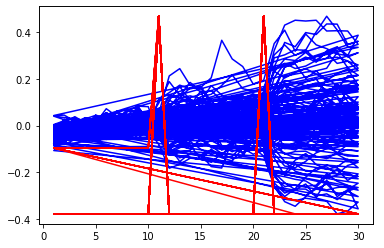

In [131]:
# Plot
x = data.index.get_level_values('Time (sec)')

fig, ax = plt.subplots()
ax.plot(x, data['deltaF_F'], 'b')

ax1 = ax.twinx()
ax1.plot(x, data['led'], 'r')
ax1.get_yaxis().set_visible(False)

plt.show()